In [5]:
import numpy as np
import pandas as pd

In [7]:
X = pd.read_csv('/home/algoritmia/Dropbox/ml_intro/vol/intermediate_results/X.csv')

In [11]:
y =X['worldwide_gross']

In [12]:
X = X.drop('worldwide_gross',axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [16]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [18]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,760505847.0


In [19]:
from sklearn.linear_model import Lasso
model = Lasso()

In [21]:
model.fit(X_train, y_train)

/home/algoritmia/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
predicted = model.predict(X_test)

In [23]:
predicted

array([-1.09015700e+07,  3.98871528e+07,  1.01487294e+08, ...,
        1.24807966e+08,  5.56812879e+07, -1.82873975e+07])

In [24]:
predicted.shape

(1642,)

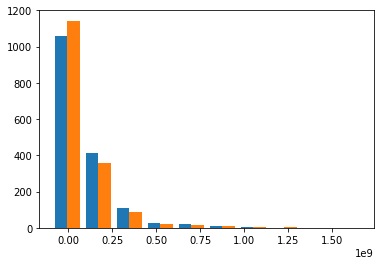

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([predicted,y_test]);

# Evaluemos de forma mas fina el comportamiento de nuestro modelo

Los estimadores y las funciones de sklearn vienen con el maximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun
conocimiento particular del problema. En este caso particular la funcion estimator.score ya viene con una de las metricas de sklearn.metrics, que es la metrica sklearn.metric.r2_score

El score R2 de una regresion es una de las formas mas comunes de entender su poder predictivo.Este mientras mas cerca de 1 este, mejor es.

Los valores que puede tomas son de -infinito hasta 1.Un score negativo es malo, ya que esto indica que la regresion es peor que simplemente eligieramos un valor fijo como prediccion para todos los puntos, la media.

In [30]:
model.score(X_test, y_test)

0.901147200017111

In [31]:
residuals =y_test - predicted

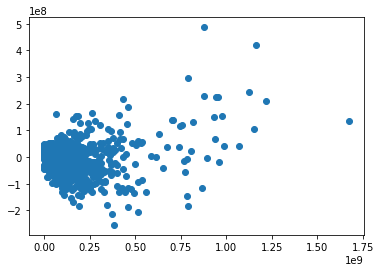

In [33]:
plt.scatter(y_test,residuals)

In [34]:
ap_residuals = np.abs(residuals)/y_test

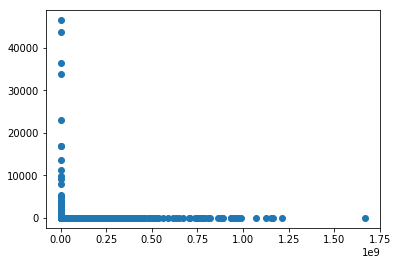

In [35]:
plt.scatter(y_test,ap_residuals)

In [36]:
lap_residuals = np.log(ap_residuals)

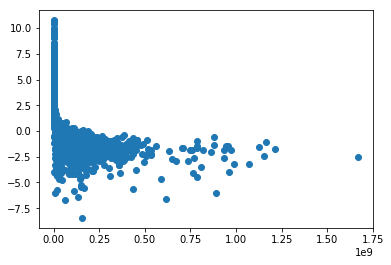

In [37]:
plt.scatter(y_test,lap_residuals)

/home/algoritmia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


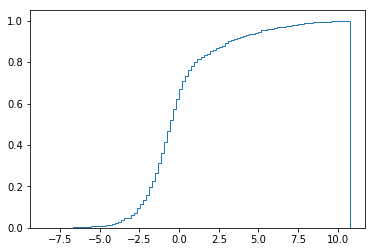

In [39]:
plt.hist(lap_residuals,bins=100,normed=1,histtype='step',cumulative=True);

/home/algoritmia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

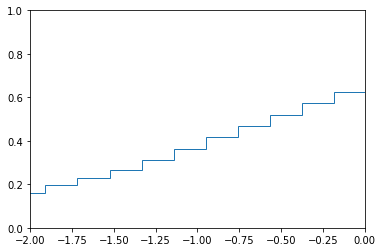

In [40]:
plt.hist(lap_residuals,bins=100,normed=1,histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))